In [8]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

#Can I write code without looking at the example code ?
#we build our circuit with 3 entry and 3 states 
Qcircuit = QuantumCircuit(3,3)
#we create an Hadamard gate on state 0
Qcircuit.h(0)
# what the c is for ?

#we can draw the circuit in several way
# in text 
Qcircuit.draw("text")
#matplotlib
Qcircuit.draw("mpl")

#Un état de bell est un circuit avec une porte Hadamard et CX C-NOT
#circuit (2,2)
Bcircuit = QuantumCircuit(2,2)
#HADAMARD
Bcircuit.h(0)
#CNOT : cx(controlled qbit, target qbit)
Bcircuit.cx(0,1)


# on recréé le circuit QuantumCircuit pour faire les mesures ? 
# est-ce que le circuit Bcircuit que l'on a écrit avant influence ce circuit aussi
measure = QuantumCircuit(2,2)
"[qubit: qubit to measure.], [cbit: classical bit to place the measurement in.]"
measure.measure([0,1],[0,1])

#we execute de quantum circuit :: 
"which one measure or Bcircuit ?"
"qu'est ce qu'un Basic Aer provider backends?"
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
"we unite the measure circuit and the Bcircuit"
circ = Bcircuit.compose(measure)
#We run backend for the results
result = backend.run(transpile(circ, backend), shots=1000).result()
#we display the results
counts  = result.get_counts(circ)
print(counts)





{'00': 506, '11': 494}


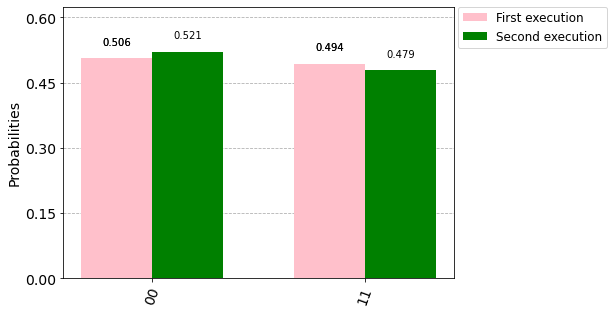

In [11]:
"There is a lot of different mean to diplays the results and the probability of each qbits"
#import plot histogram beforehand 
plot_histogram(counts)
"options"
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend, color = ["pink","green"])